In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
credit_card_df=pd.read_csv(r"C:\Users\Subhanghi\Downloads\creditcard.csv\creditcard.csv")

In [4]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
credit_card_df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

<Axes: ylabel='count'>

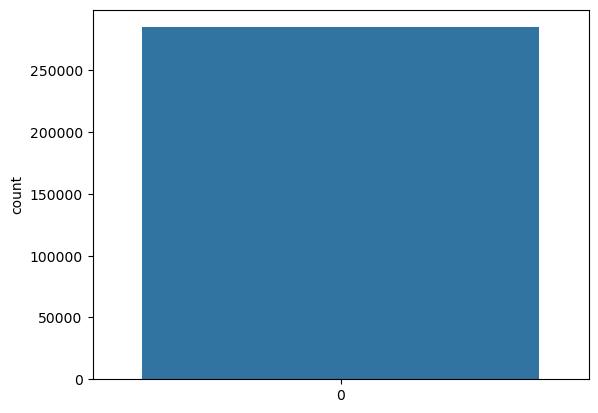

In [7]:
sns.countplot(credit_card_df['Class'])

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_7476\1404803260.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(legit_df[col],ax=ax[index])
C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_7476\1404803260.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(legit_df[col],ax=ax[index])
C:\Users

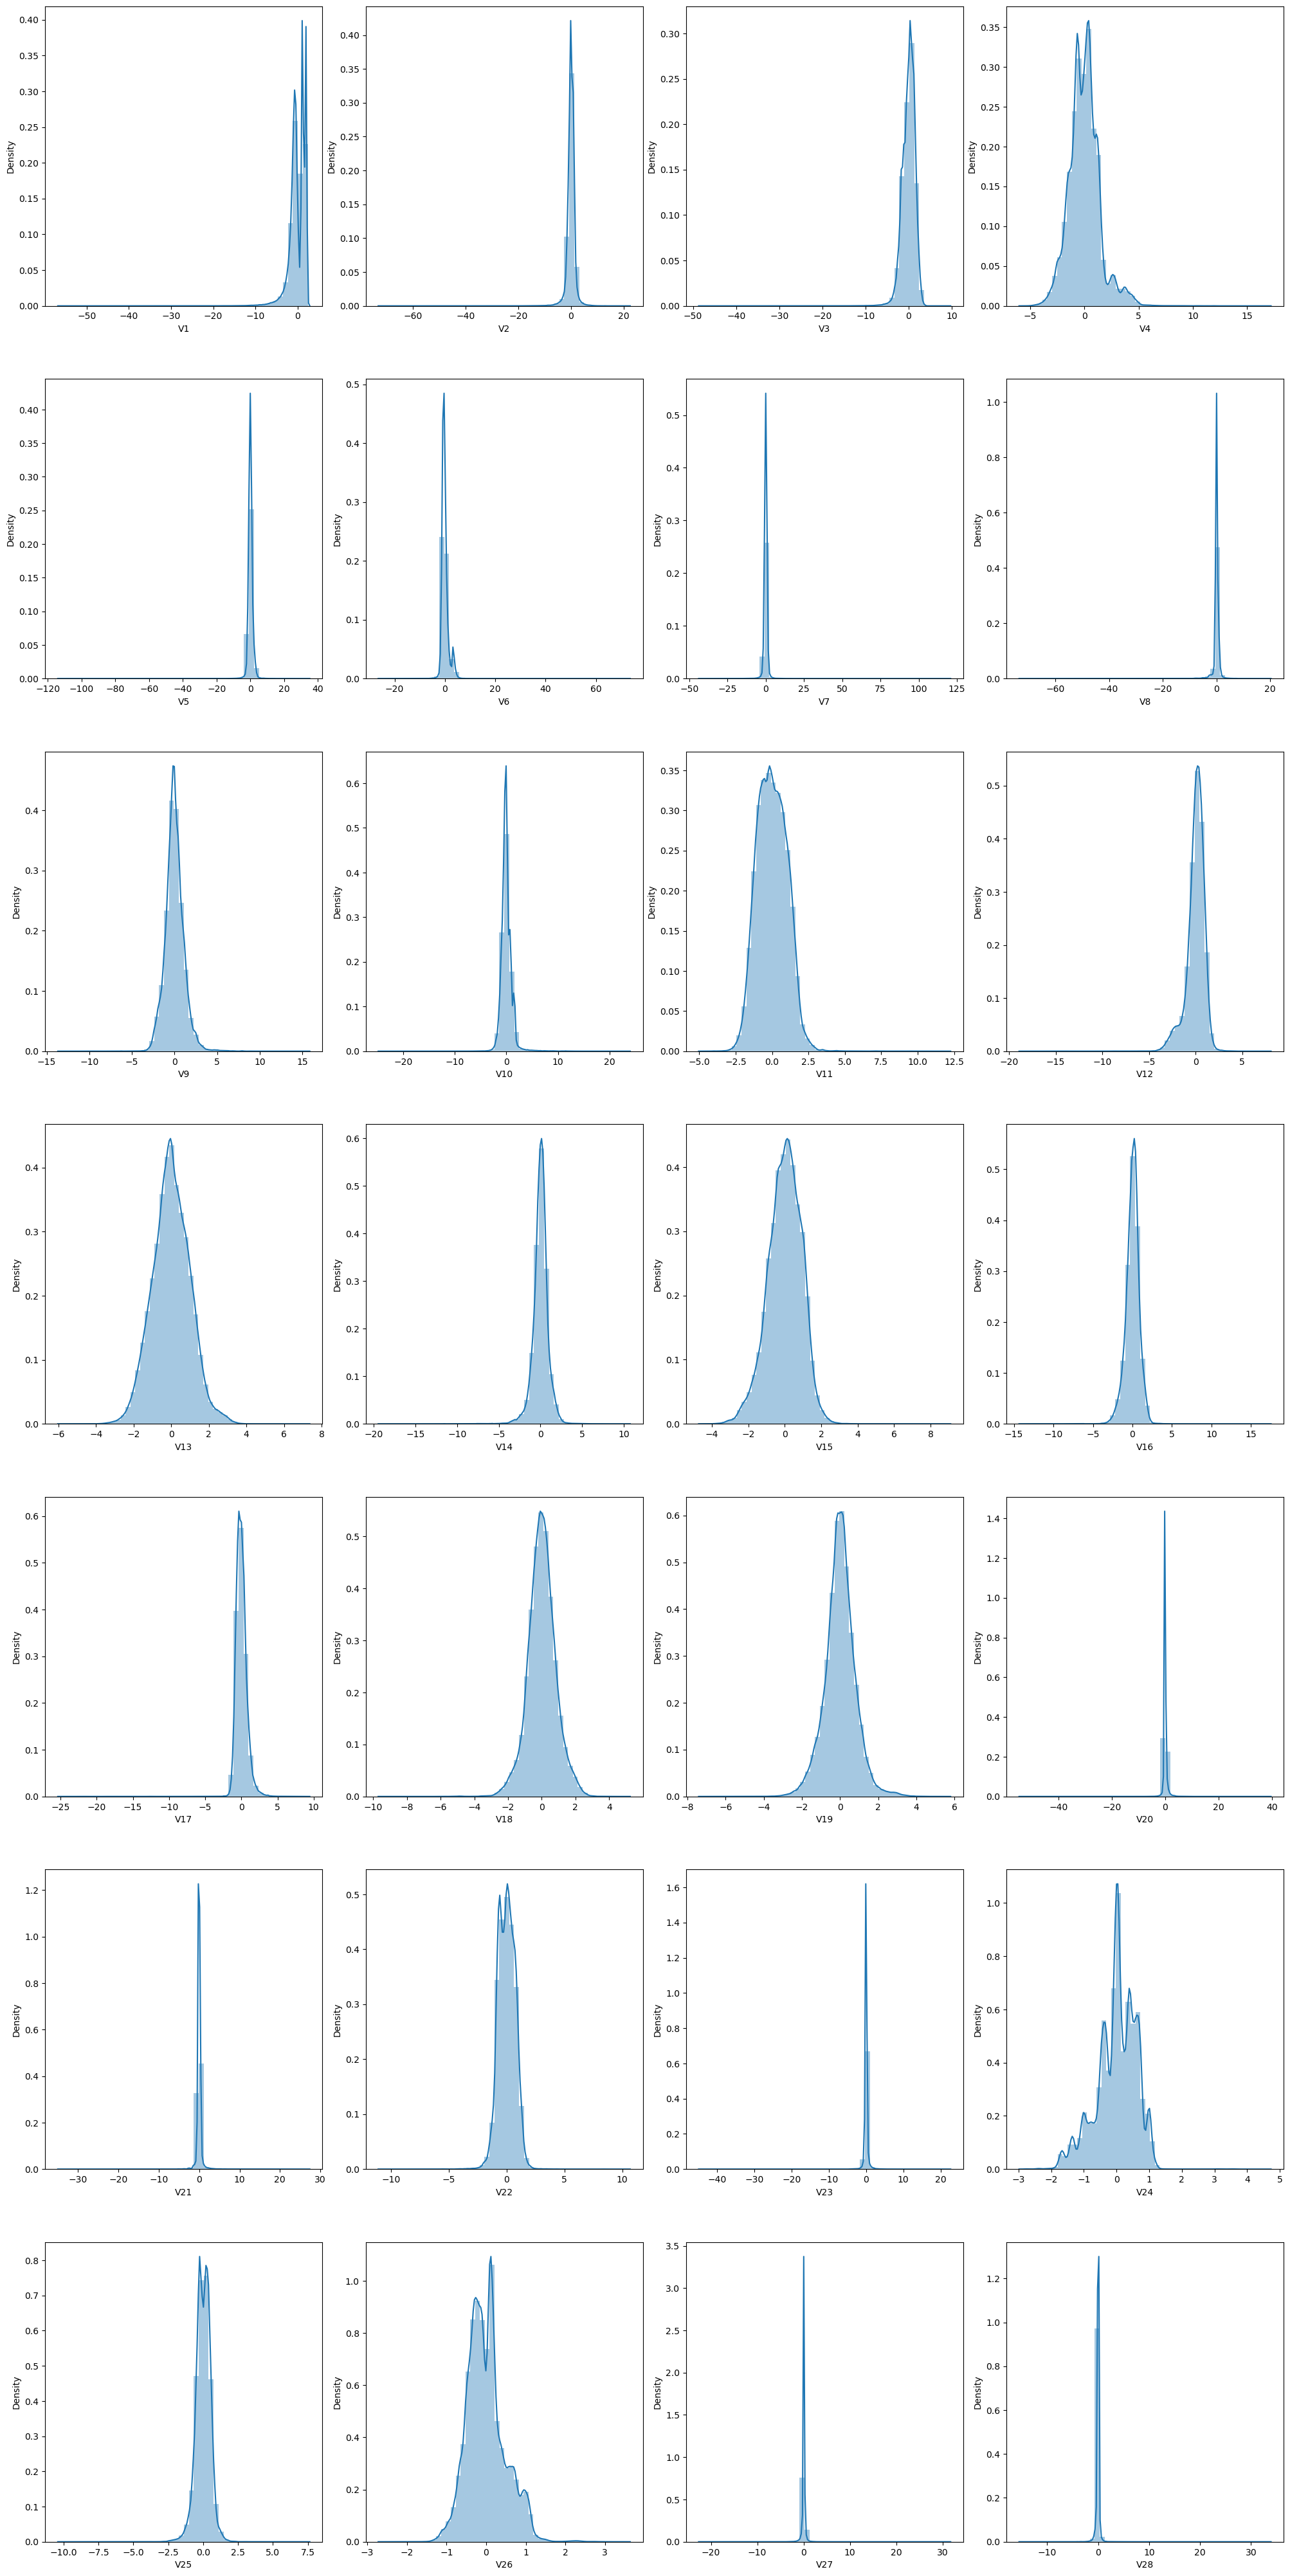

In [7]:
legit_df=credit_card_df.drop(columns=["Class","Amount","Time"],axis=1)
fig,ax=plt.subplots(ncols=4,nrows=7,figsize=(20,40))
index=0
ax=ax.flatten()
for col in legit_df.columns:
    sns.distplot(legit_df[col],ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=5)

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_17264\2086648649.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_df["Amount"])


<Axes: xlabel='Amount', ylabel='Density'>

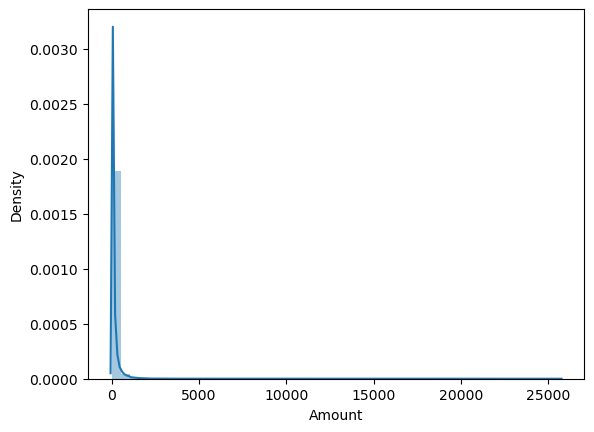

In [8]:
sns.distplot(credit_card_df["Amount"])

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_7476\2586973241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_df["Time"])


<Axes: xlabel='Time', ylabel='Density'>

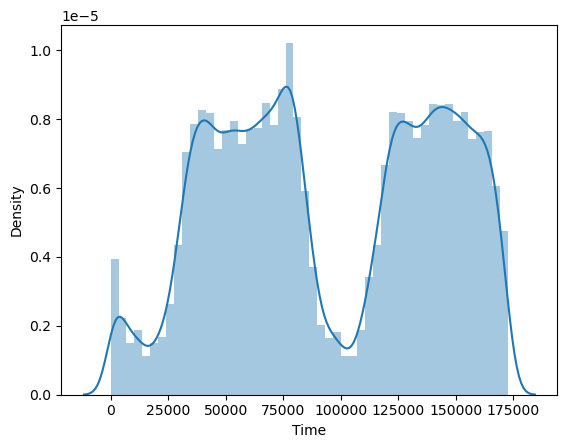

In [10]:
sns.distplot(credit_card_df["Time"])

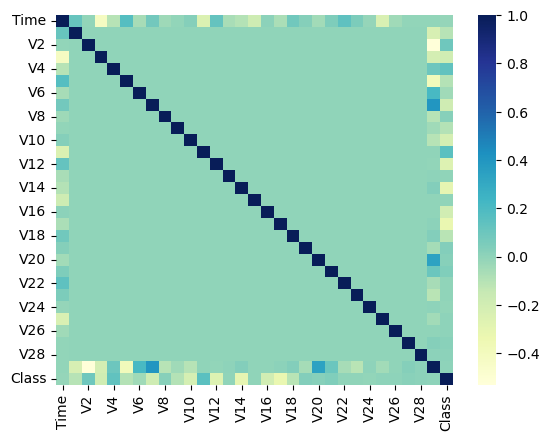

In [9]:
sns.heatmap(credit_card_df.corr(),cmap='YlGnBu')
plt.show()

In [11]:
X=credit_card_df.drop(columns=['Class'],axis=1)
Y=credit_card_df['Class']


In [12]:
sc=StandardScaler()

In [14]:
X_scaler=sc.fit_transform(X)

In [15]:
X_scaler

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaler,Y,test_size=0.2,random_state=42)

In [39]:
log=LogisticRegression()
log.fit(X_train,Y_train)
Y_pred=log.predict(X_test)


In [44]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     56864\n           1       0.86      0.58      0.70        98\n\n    accuracy                           1.00     56962\n   macro avg       0.93      0.79      0.85     56962\nweighted avg       1.00      1.00      1.00     56962\n'

In [31]:
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [32]:
Y_pred=linear.predict(X_test)
Y_pred

array([ 1.21818471e+00, -5.77778635e-04, -7.26429735e-04, ...,
        1.32486993e-03,  1.08120824e-03,  5.02171210e-03])

In [33]:
accuracy=r2_score(Y_test,Y_pred)

In [34]:
accuracy

0.5166663660896537

In [52]:
model=RandomForestClassifier()
model.fit(X_train,Y_train) ##training
Y_pred=model.predict(X_test)## testing
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

